In [5]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [6]:
class NN():
    
    def __init__(self, n_input, n_hidden, n_output):
        
        self.weights, self.biases = [],[]
        self.layer_val, self.layer_err = [],[]
        self.errors = []
        for i in range(len(n_hidden)+1):
            if(i==0):
                self.weights.append(np.zeros((n_input,n_hidden[i])))
            elif(i==len(n_hidden)):
                self.weights.append(np.zeros((n_hidden[-1],n_output)))
            else:
                self.weights.append(np.zeros((n_hidden[i-1],n_hidden[i])))
            self.biases.append(np.zeros((1)))
    
    # Activation functions and their derivatives
    def relu(self, x):
        return x*(x>0)
    
    def reluDerivative(self, x):
        return 1.*(x>0)
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def sigmoidDerivative(self, x):
        return x*(x-1)
    
    def softmax(self, X):
        exps = np.exp(X - np.max(X))
        return exps / np.sum(exps)
    
    def softmaxDerivative(self, s):
        s = s.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)
    
    # Weight and bias initializers
    def initialize_weights(self):
        
        for i in range(len(self.weights)):
            self.weights[i] = np.random.uniform(low=0, high=5, size=self.weights[i].shape)
            
    def initialize_biases(self):
        
        for i in range(len(self.biases)):
            self.biases[i] = np.random.uniform(low=0, high=5, size=self.biases[i].shape)
    
    def plot_weights(self):
        
        for i in range(len(self.weights)):
            print(self.weights[i])
            print(self.biases[i])
            print(self.weights[i].shape, self.biases[i].shape, "\n\n\n")
    
    # forward pass
    def forward(self, inputs):
        
        self.layer_val, self.layer_err = [],[]
        for i in range(len(self.weights)):
            if(i==0):
                val = np.reshape(self.relu(np.matmul(inputs,self.weights[i])), (-1, self.weights[i].shape[1]))
            else:
                val = np.reshape(self.relu(np.matmul(val,self.weights[i])), (-1, self.weights[i].shape[1]))
            print("layer ",i," value ",val,"\n")
            self.layer_val.append(val)
        return val
    
    # backward pass
    def backward(self, inputs, outputs, lr=0.001):
        
        l = len(self.layer_val)-1
        for i in range(l,-1,-1):
            if(i == l):
                err = np.reshape(outputs-self.layer_val[i], (-1,outputs.shape[0]))
                err_delta = err * self.reluDerivative(self.layer_val[i])
                self.errors.append(np.mean(np.abs(err)))
            else:
                err_delta = self.reluDerivative(self.layer_err[l-(i+1)].dot(self.weights[i+1].T))
            self.layer_err.append(err_delta)
        for i in range(l,0,-1):
            print(self.layer_val[i-1].shape, self.layer_err[l-i].shape)
            self.weights[i] += lr * self.layer_val[i-1].T.dot(self.layer_err[l-i])
        self.weights[0] += lr * inputs[np.newaxis].T.dot(self.layer_err[l])

In [7]:
# parameter for model
in_dim = 1
out_dim = 1
hid_dim = [3,5,3]

In [8]:
# create model
c = NN(n_input=in_dim, n_hidden=hid_dim, n_output=out_dim)

In [9]:
# initialize weights and biases
c.initialize_weights()
c.initialize_biases()

In [10]:
# create data random
num_instances = 100
inputs =  np.random.randint(low=0, high=10, size=(num_instances,in_dim))
outputs = inputs * 10 + 3

In [11]:
inputs, outputs

(array([[3],
        [5],
        [4],
        [9],
        [7],
        [7],
        [4],
        [1],
        [2],
        [8],
        [1],
        [3],
        [8],
        [6],
        [6],
        [4],
        [0],
        [7],
        [0],
        [3],
        [0],
        [0],
        [2],
        [8],
        [3],
        [1],
        [3],
        [9],
        [2],
        [7],
        [8],
        [8],
        [6],
        [1],
        [7],
        [0],
        [2],
        [3],
        [4],
        [1],
        [8],
        [1],
        [5],
        [8],
        [2],
        [9],
        [0],
        [9],
        [9],
        [1],
        [7],
        [3],
        [4],
        [4],
        [8],
        [1],
        [6],
        [0],
        [5],
        [6],
        [0],
        [5],
        [1],
        [3],
        [1],
        [7],
        [4],
        [4],
        [6],
        [0],
        [0],
        [4],
        [0],
        [0],
        [5],
        [7],
        [4],

In [12]:
for i in range(10):
    print("-------------------------------------------------------------------------------")
    print("Epoch : ", i)
    print("-------------------------------------------------------------------------------")
    for index in range(inputs.shape[0]):
        out = c.forward(inputs[index])
        c.backward(inputs[index], outputs[index], lr=0.0001)
        print(c.errors[index], out)

-------------------------------------------------------------------------------
Epoch :  0
-------------------------------------------------------------------------------
layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

layer  1  value  [[80.50434086 82.08256243 52.1540698  81.76411448 84.30739522]] 

layer  2  value  [[518.44533066 485.24493674 752.11678772]] 

layer  3  value  [[3105.90554331]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3072.905543308572 [[3105.90554331]]
layer  0  value  [[11.23334418 17.78999853  8.91426901]] 

layer  1  value  [[134.17390143 136.80427072  86.92344967 136.27352413 140.51232537]] 

layer  2  value  [[ 864.0755511   808.74156123 1253.52797953]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

laye

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[2.24666884 3.55799971 1.7828538 ]] 

layer  1  value  [[26.83478029 27.36085414 17.38468993 27.25470483 28.10246507]] 

layer  2  value  [[172.81511022 161.74831225 250.70559591]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[13.48001301 21.34799824 10.69712281]] 

layer  1  value  [[161.00868172 164.16512487 104.30813961 163.52822896 168.61479045]] 

layer  2  value  [[1036.89066132  970.48987348 1504.23357544]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1

(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[4.49333767 7.11599941 3.5657076 ]] 

layer  1  value  [[53.66956057 54.72170829 34.76937987 54.50940965 56.20493015]] 

layer  2  value  [[345.63022044 323.49662449 501.41119181]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[2.24666884 3.55799971 1.7828538 ]] 

layer  1  value  [[26.83478029 27.36085414 17.38468993 27.25470483 28.10246507]] 

layer  2  value  [[172.81511022 161.74831225 250.70559591]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

layer  1  value  [[80.50434086 82.08256243 52.1540698 

layer  2  value  [[1036.89066132  970.48987348 1504.23357544]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[11.23334418 17.78999853  8.91426901]] 

layer  1  value  [[134.17390143 136.80427072  86.92344967 136.27352413 140.51232537]] 

layer  2  value  [[ 864.0755511   808.74156123 1253.52797953]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[13.48001301 21.34799824 10.69712281]] 

layer  1  value  [[161.00868172 164.16512487 104.30813961 163.52822896 168.61479045]] 

layer  2  value  [[1036.89066132  970.48987348 1504.23357544]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  valu

layer  2  value  [[172.81511022 161.74831225 250.70559591]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

layer  1  value  [[80.50434086 82.08256243 52.1540698  81.76411448 84.30739522]] 

layer  2  value  [[518.44533066 485.24493674 752.11678772]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[13.48001301 21.34799824 10.69712281]] 

layer  1  value  [[161.00868172 164.16512487 104.30813961 163.52822896 168.61479045]] 

layer  2  value  [[1036.89066132  970.48987348 1504.23357544]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[15.72668185 24.90599795 12.47997661]] 

layer  1  value  [[187.84346201 191.52597901 121.69282954 190.78293378 196.71725552]] 

layer  2  value  [[1209.70577153 1132.23818573 1754.93917135]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
73.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[13.48001301 21.34799824 10.69712281]] 

laye

(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[15.72668185 24.90599795 12.47997661]] 

layer  1  value  [[187.84346201 191.52597901 121.69282954 190.78293378 196.71725552]] 

layer  2  value  [[1209.70577153 1132.23818573 1754.93917135]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
73.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[ 6.7

(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[13.48001301 21.34799824 10.69712281]] 

layer  1  value  [[161.00868172 164.16512487 104.30813961 163.52822896 168.61479045]] 

layer  2  value  [[1036.89066132  970.48987348 1504.23357544]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[0. 0

(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[4.49333767 7.11599941 3.5657076 ]] 

layer  1  value  [[53.66956057 54.72170829 34.76937987 54.50940965 56.20493015]] 

layer  2  value  [[345.63022044 323.49662449 501.41119181]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

layer  1  value  [[80.50434086 82.08256243 52.1540698  81.76411448 84.30739522]] 

layer  2  value  [[518.44533066 485.24493674 752.11678772]] 

layer  3  val

layer  0  value  [[11.23334418 17.78999853  8.91426901]] 

layer  1  value  [[134.17390143 136.80427072  86.92344967 136.27352413 140.51232537]] 

layer  2  value  [[ 864.0755511   808.74156123 1253.52797953]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[15.72668185 24.90599795 12.47997661]] 

layer  1  value  [[187.84346201 191.52597901 121.69282954 190.78293378 196.71725552]] 

layer  2  value  [[1209.70577153 1132.23818573 1754.93917135]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
73.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

layer  1  value  [[80.50434086 82.08256243 52.1540698  81.7

(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[13.48001301 21.34799824 10.69712281]] 

layer  1  value  [[161.00868172 164.16512487 104.30813961 163.52822896 168.61479045]] 

layer  2  value  [[1036.89066132  970.48987348 1504.23357544]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
63.0 [[-0.]]
layer  0  value  [[2.24666884 3.55799971 1.7828538 ]] 

layer  1  value  [[26.83478029 27.36085414 17.38468993 27.25470483 28.10246507]] 

layer  2  value  [[172.81511022 161.74831225 250.70559591]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[15.72668185 24.90599795 12.47997661]] 

layer  1  value  [[187.84346201 191.5259790

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[15.72668185 24.90599795 12.47997661]] 

layer  1  value  [[187.84346201 191.52597901 121.69282954 190.78293378 196.71725552]] 

layer  2  value  [[1209.70577153 1132.23818573 1754.93917135]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
73.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

laye

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[2.24666884 3.55799971 1.7828538 ]] 

layer  1  value  [[26.83478029 27.36085414 17.38468993 27.25470483 28.10246507]] 

layer  2  value  [[172.81511022 161.74831225 250.70559591]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[2.24666884 3.55799971 1.7828

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
73.0 [[-0.]]
layer  0  value  [[4.49333767 7.11599941 3.5657076 ]] 

layer  1  value  [[53.66956057 54.72170829 34.76937987 54.50940965 56.20493015]] 

layer  2  value  [[345.63022044 323.49662449 501.41119181]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[15.72668185 24.90599795 12.47997661]] 

layer  1  value  [[187.84346201 191.52597901 121.69282954 190.78293378 196.71725552]] 

layer  2  value  [[1209.70577153 1132.23818573 1754.93917135]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
73.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.1

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[2.24666884 3.55799971 1.7828538 ]] 

layer  1  value  [[26.83478029 27.36085414 17.38468993 27.25470483 28.10246507]] 

layer  2  value  [[172.81511022 161.74831225 250.70559591]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[2.24666884 3.55799971 1.7828

layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

layer  1  value  [[80.50434086 82.08256243 52.1540698  81.76411448 84.30739522]] 

layer  2  value  [[518.44533066 485.24493674 752.11678772]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[11.23334418 17.78999853  8.91426901]] 

layer  1  value  [[134.17390143 136.80427072  86.92344967 136.27352413 140.51232537]] 

layer  2  value  [[ 864.0755511   808.74156123 1253.52797953]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[20.22001952 32.02199736 16.04568422]] 

layer  1  value  [[241.51302258 246.2476873  156.46220941 245.29234344 252.92218567]] 

layer  2  value  [[1555.33599197 1455.73481022 2256.35036316]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763

(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[4.49333767 7.11599941 3.5657076 ]] 

layer  1  value  [[53.66956057 54.72170829 34.76937987 54.50940965 56.20493015]] 

layer  2  value  [[345.63022044 323.49662449 501.41119181]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
23.0 [[-0.]]
layer  0  value  [[20.22001952 32.02199736 16.04568422]] 

layer  1  value  [[241.51302258 246.2476873  156.46220941 245.29234344 252.92218567]] 

layer  2  value  [[1555.33599197 1455.73481022 2256.35036316]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[0. 0. 0.]] 

layer  1  value  [[0. 0. 0. 0. 0.]] 

layer  2  value  [[0. 0. 0.]] 

layer  3  value  [[0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
3.0 [[0.]]
layer  0  value  [[20.22001952 32.02199736 16.04568422]] 

layer  1  value  [[241.51302258 246.2476873  156.46220941 245.29234344 252.92218567]] 

layer  2  value  [[1555.33599197 1455.73481022 2256.35036316]] 

lay

(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[17.97335069 28.46399765 14.26283042]] 

layer  1  value  [[214.67824229 218.88683316 139.07751948 218.03763861 224.8197206 ]] 

layer  2  value  [[1382.52088175 1293.98649797 2005.64476725]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
83.0 [[-0.]]
layer  0  value  [[20.22001952 32.02199736 16.04568422]] 

layer  1  value  [[241.51302258 246.2476873  156.46220941 245.29234344 252.92218567]] 

layer  2  value  [[1555.33599197 1455.73481022 2256.35036316]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
93.0 [[-0.]]
layer  0  value  [[11.23334418 17.78999853  8.91426901]] 

layer  1  value  [[134.17390143 136.80427072  86.92344967 136.27352413 140.51232537]] 

layer  2  value  [[ 864.0755511   808.74156123 1253.52797953]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
53.0 [[-0.]]
layer  0  value  [[13.48001301 21.34799824 10.69712281]] 

layer  1  value  [[161.00868172 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
13.0 [[-0.]]
layer  0  value  [[15.72668185 24.90599795 12.47997661]] 

layer  1  value  [[187.84346201 191.52597901 121.69282954 190.78293378 196.71725552]] 

layer  2  value  [[1209.70577153 1132.23818573 1754.93917135]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
73.0 [[-0.]]
layer  0  value  [[ 6.74000651 10.67399912  5.34856141]] 

layer  1  value  [[80.50434086 82.08256243 52.1540698  81.76411448 84.30739522]] 

layer  2  value  [[518.44533066 485.24493674 752.11678772]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
33.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  7.13141521]] 

layer  1  value  [[107.33912115 109.44341658  69.53875974 109.01881931 112.4098603 ]] 

layer  2  value  [[ 691.26044088  646.99324899 1002.82238363]] 

layer  3  value  [[-0.]] 

(1, 3) (1, 1)
(1, 5) (1, 3)
(1, 3) (1, 5)
43.0 [[-0.]]
layer  0  value  [[ 8.98667534 14.23199883  

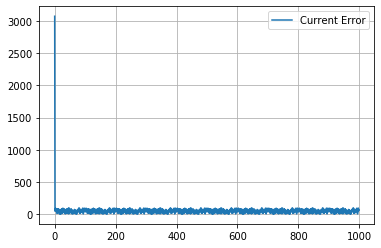

In [13]:
plt.plot(c.errors, label="Current Error")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
c.plot_weights()


[[2.24666884 3.55799971 1.7828538 ]]
[2.83294234]
(1, 3) (1,) 



[[2.05438552 2.33779388 4.51367383 0.39262907 4.4243214 ]
 [3.76248655 4.46781396 0.21137791 4.93858957 4.42609338]
 [4.95404072 3.48437135 3.64128402 4.93652203 1.35425636]]
[3.26509969]
(3, 5) (1,) 



[[2.82803815 0.05143844 0.76054138]
 [0.17175337 0.60892696 2.62533728]
 [3.2410216  3.44438863 2.6734972 ]
 [0.96758562 2.06111983 2.7288719 ]
 [0.33842557 0.98398379 1.33841094]]
[4.42435768]
(5, 3) (1,) 



[[-154.51968843]
 [-147.87314288]
 [-231.0919279 ]]
[3.89665781]
(3, 1) (1,) 



